# example of earthquake feature-predicting CNN
Ong, Giani, Nielsen

Modified for multiple station feature prediction by Dewsnap

**mount Google Drive as a disk to access files and data**






In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd "/content/drive/MyDrive/DISS_FOLDER/New_Data"

/content/drive/MyDrive/DISS_FOLDER/New_Data


In [3]:
#cd  "/content/drive/MyDrive/DISS_FOLDER/Veda_Data"

In [4]:
import pickle
import numpy as np

**set choice for input files (determines the type of normalisation)**

In [5]:
choice = 'new2' # old=norm on all 3 components together. new=norm on individual components. new2=no norm. 

dropoutYN = True
dropoutRate = 0.15  #typical = 0.02

**set name of output model weights**

In [6]:
# name of model weights file with version number of the training
tnum=2
WeightsFile='./model_'+str(tnum)+'.h5'
print('weights for the pending training will be saved in:',WeightsFile)

weights for the pending training will be saved in: ./model_2.h5


**read input files**

In [7]:
print(choice)

def loadData():
  dataList = pickle.load( open( "./Feature_Data/normnoise_"+choice+".p", "rb" ) )
  normpre = pickle.load( open( "./Feature_Data/normpre_"+choice+".p", "rb" ) )
  testlist = pickle.load( open( "./Feature_Data/testlist.p", "rb" ) )
  trainlist = pickle.load( open( "./Feature_Data/trainlist.p", "rb" ) )

  x_train = [normpre[i] for i in trainlist]
  x_test = [normpre[i] for i in testlist]
  print(len(x_train))
  print(len(x_test))

  data_train = [dataList[i] for i in trainlist]
  data_test = [dataList[i] for i in testlist]
  print(dataList[0])
  #print(data_train[0])

  #x_noise_train = [normnoise[i] for i in trainlist]
  #x_noise_test = [normnoise[i] for i in testlist]

  return [x_train,x_test,data_train,data_test]


new2


In [8]:
def processData():

  [x_train,x_test,data_train,data_test] = loadData()

  #print(x_train[0][0][0])

  window_length=16384
  L=len(x_train[0][0][0])

  #37 windows
  #Make data into a format such that it can be concatenated
  x_train = np.reshape(x_train, (len(x_train)*len(x_train[0]), window_length, L))
  x_test = np.reshape(x_test, (len(x_test)*len(x_test[0]), window_length, L))

  
  #x_noise_train2 = np.expand_dims(x_noise_train, axis=-1)
  #x_noise_test2 = np.expand_dims(x_noise_test, axis=-1)
  #x_noise_train2 = np.reshape(x_noise_train2, (len(x_noise_train)*len(x_noise_train[0]), window_length, L))
  #x_noise_test2 = np.reshape(x_noise_test2, (len(x_noise_test)*len(x_noise_test[0]), window_length, L))

  # Generate ground truth (ones = 'precursor' class, zeros = 'noise' class)
  y_train=[]
  y_test=[]
  print("train")
  for event in data_train:
    print(event)
    for i in range(37):
      y_train.append(event)
  print("test")
      
  for event in data_test:
    print(event)
    for i in range(37):
      y_test.append(event)
  #y_noise_train2 = np.zeros(len(x_noise_train2))
  #y_noise_test2 = np.zeros(len(x_noise_test2))
  #y_train  = y_train2.tolist()
  #y_test = y_test2.tolist()
  #y_noise_train2 = y_noise_train2.tolist()
  #y_noise_test2 = y_noise_test2.tolist()

  #Concatenate noise and precursor datasets 
  #x_train = x_train2#np.append(x_train2,x_noise_train2, axis=0)
  #x_test = x_test2#np.append(x_test2,x_noise_test2, axis=0)
  #y_train = np.append(y_train2,y_noise_train2, axis=0)
  #y_test = np.append(y_test2,y_noise_test2, axis=0)

  y_train = np.array(y_train)
  y_test = np.array(y_test)

  print(x_train.shape)
  print(x_test.shape)
  print(y_train.shape)
  print(y_test.shape)
  return [x_train,x_test,y_train,y_test,L,window_length]

[x_train,x_test,y_train,y_test,L,window_length] = processData()


27
7
[1.400517516941963, 0.1671685703939869, -0.4916068351053157, 4.37064899548614]
train
[0.6612911529368559, 0.3476156427573844, -0.1219437867760916, -0.556596218631846]
[0.6697215985304958, 0.33968209955159623, -0.07641878082421671, -0.556596218631846]
[-0.2967696823173822, -0.7982396809775099, 0.1767002522682077, 0.10036980991721933]
[1.6466074529923171, 1.8737995563687047, -0.4733968327245658, -0.8850792329063774]
[0.7088766181560254, 0.323256929411058, -0.029983274753304322, -0.556596218631846]
[1.0229585443118188, 0.9741138711957852, -0.11739128618090412, 0.10036980991721933]
[0.3764288196025899, 0.31945977149049554, -0.2248303002273289, 1.7427848812898814]
[0.4935622724497757, 0.4938882938357074, -0.4615603311770783, -0.22811320435731192]
[0.5098747382807378, 0.4458930931452359, -0.4843228341530157, 1.4143018670153502]
[-0.074160003964291, -0.5786063765866236, -0.5307583402239281, -0.22811320435731192]
[-1.403504805446146, 0.3186281173061649, 4.060893760082173, 0.10036980991721

In [9]:
!pip install pip install np_utils

#from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical
import tensorflow as tf 
import numpy as np
import time
import os
from keras.models import Model
from keras.layers import Conv1D, BatchNormalization, Add, MaxPooling1D, Dropout, Dense, Flatten, CuDNNLSTM, ZeroPadding1D
from keras.layers import Activation, Input, concatenate, GaussianNoise, GlobalMaxPooling1D, GlobalAveragePooling1D, Softmax, Permute, Multiply, Masking
#from keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.optimizers import Adam,RMSprop, SGD
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from keras.regularizers import *  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 658 kB/s 
  Created wheel for np-utils: filename=np_utils-0.6.0-py3-none-any.whl size=56459 sha256=4101bb44193ef94749a85f65dcaca24412eddca3335ae9db6d2413a872d424a2
  Stored in directory: /root/.cache/pip/wheels/d2/83/71/a781667865955ae7dc18e5a4038401deb56d96eb85d3a5f1c0
Successfully built np-utils


**buid the CNN footprint**

In [10]:

#y_train= to_categorical(y_train, num_classes=2)
#y_test= to_categorical(y_test, num_classes=2)



def encoder(input_shape, nb_classes,TRAINBOOL):
    
    input_layer= Input(input_shape)
    random = Conv1D(L, 3, padding='same', kernel_initializer='random_normal')(input_layer) #NEED TO CHANGE 3->L??

    X = Add()([input_layer, random])

    conv3 = Conv1D(filters=32, kernel_size=7,padding='same', strides=1, kernel_initializer='random_normal')(X)
    conv3 = Conv1D(filters=32, kernel_size=7,padding='same', strides=1, kernel_initializer='random_normal')(conv3)
    conv3 = MaxPooling1D(3, strides=1)(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)

    conv4 = Conv1D(64, kernel_size=7,padding='same', strides=1, kernel_initializer='random_normal')(conv3)
    conv4 = Conv1D(64, kernel_size=7,padding='same', strides=1, kernel_initializer='random_normal')(conv4)        
    conv4 = MaxPooling1D(3, strides=2)(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation('relu')(conv4)

    conv5 = Conv1D(filters=64, kernel_size=5, padding='same', dilation_rate=2, kernel_initializer='random_normal')(conv4)
    conv5 = MaxPooling1D(3, strides=1)(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation('relu')(conv5)
        
    conv3 = Conv1D(filters=128, kernel_size=5,padding='same', dilation_rate=4 , kernel_initializer='random_normal')(conv5)
    conv3 = MaxPooling1D(3, strides=1)(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)

    conv3 = Conv1D(filters=128, kernel_size=5,padding='same', dilation_rate=8 , kernel_initializer='random_normal')(conv3)
    conv3 = MaxPooling1D(3, strides=1)(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)

    conv4 = Conv1D(256, kernel_size=3,padding='same',  dilation_rate=16 , kernel_initializer='random_normal')(conv3)
    conv4 = MaxPooling1D(3, strides=1)(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation('relu')(conv4)

    conv5 = Conv1D(filters=256, kernel_size=3, padding='same', dilation_rate=32, kernel_initializer='random_normal')(conv4)
    conv5 = MaxPooling1D(3, strides=1)(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation('relu')(conv5)
    conv5 = Dropout(dropoutRate)(conv5,training=TRAINBOOL)
  
    X = GlobalAveragePooling1D()(conv5)
    X = Dense(512, activation='relu', kernel_initializer='random_normal')(X)
    X = Dropout(dropoutRate)(X,training=TRAINBOOL)

    Y = Dense(512, activation='relu', kernel_initializer='random_normal')(X)
    Y = Dropout(dropoutRate)(Y,training=TRAINBOOL)

    Z = Dense(256, activation='relu', kernel_initializer='random_normal')(Y)
    Z = Dropout(dropoutRate)(Z,training=TRAINBOOL)

  

  
    output_layer = Dense(nb_classes, activation='softmax', kernel_initializer='random_normal')(Z)
    
    model = Model(inputs=input_layer, outputs=output_layer)

        
    return model      
    
model=encoder((window_length, L), 4, dropoutYN) #so it applies dropout to both
     #NEED TO CHANGE 3->L I THINK    #changed output number of classes to 4

model.compile(loss='mean_squared_error', optimizer=RMSprop(0.0001), metrics=['mean_squared_error']) #changed loss to mean squared error  #changed metrics to val_mean_squared_error
model.summary()  


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 16384, 9)]   0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 16384, 9)     252         ['input_1[0][0]']                
                                                                                                  
 add (Add)                      (None, 16384, 9)     0           ['input_1[0][0]',                
                                                                  'conv1d[0][0]']                 
                                                                                                  
 conv1d_1 (Conv1D)              (None, 16384, 32)    2048        ['add[0][0]']                

In [11]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
#from matplotlib import pyplot as plt
#from keras.callbacks import TensorBoard
#from keras import backend as K


class My_Callback(Callback):

    def on_epoch_begin(self, epoch, logs={}):
        session = K.get_session()
        self.model.layers[1].kernel.initializer.run(session=session)
        return

    def on_epoch_end(self, epoch, logs={}):
        #layer_index = 0  ## index of the layer you want to change
        # random weights to reset the layer
        #new_weights = np.random.randn(*self.model.layers[layer_index].get_weights().shape)

        #self.model.layers[layer_index].set_weights(new_weights)

        return

callbacks = [
    EarlyStopping(patience=30, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.000001, verbose=1),
    ModelCheckpoint(filepath=WeightsFile, verbose=1, save_best_only=True, monitor='val_mean_squared_error', save_weights_only=False, mode='max'), #changed val_accuracy to val_mean_squared_error
    My_Callback()]



**start training the cnn**

In [ ]:
#!%%pypy
# This callback reinitialises the weights in the first layer of the neural network (random layer in my report) at the start of each epoch.
class My_Callback(Callback):

    def on_epoch_begin(self, epoch, logs={}):
        # Code change to implement random layer in new version of TensorFlow
        # Get current weights
        weights = self.model.layers[1].get_weights()
        new_weights = []
        # Only the kernel is re-initialized, not the bais. For this reason I copy the old bais in the new weights.
        # I want the new weights to have the same distribution as the old ones. 
        # For this reason, I scale the normal distribution by the stddev and mean of the initializer of the layer.
        # To make sure that the right number of weights are generated, I use the shape of the old weights as a template.
        new_weights.append(self.model.layers[1].kernel_initializer.stddev * np.random.randn(*weights[0].shape) + self.model.layers[1].kernel_initializer.mean)
        
        new_weights.append(weights[1])
        self.model.layers[1].set_weights(new_weights)
        
        return

    def on_epoch_end(self, epoch, logs={}):

        return

# Changed val_acc into val_accuracy in monitor to fir with new version of TensorFlow

# Changed Early Stopping patience from 15 to 30
callbacks = [EarlyStopping(patience=30, verbose=1), #typical patience = 30
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    #ModelCheckpoint('weights_nonorm.h5', verbose=1, save_best_only=True, monitor='val_accuracy', save_weights_only=True),
    ModelCheckpoint(WeightsFile, verbose=1, save_best_only=True, monitor='val_mean_squared_error', save_weights_only=True), #changed val_accuracy to val_mean_squared_error
    My_Callback()]

#model.fit(x_train, y_train, batch_size=16, epochs=100, shuffle=True, callbacks=callbacks,
#                    validation_data=(x_test, y_test))
CNNmodel = model.fit(x_train, y_train, batch_size=32, epochs=100, shuffle=True, callbacks=callbacks, validation_data=(x_test, y_test)) 


Epoch 1/100
 6/32 [====>.........................] - ETA: 9s - loss: 1.0645 - mean_squared_error: 1.0645

32/32 [==============================] - ETA: 0s - loss: 0.9103 - mean_squared_error: 0.9103
Epoch 1: val_mean_squared_error improved from inf to 1.41209, saving model to ./model_2.h5
32/32 [==============================] - 31s 441ms/step - loss: 0.9103 - mean_squared_error: 0.9103 - val_loss: 1.4121 - val_mean_squared_error: 1.4121 - lr: 1.0000e-04
Epoch 2/100
32/32 [==============================] - ETA: 0s - loss: 0.8119 - mean_squared_error: 0.8119
Epoch 2: val_mean_squared_error did not improve from 1.41209
32/32 [==============================] - 12s 387ms/step - loss: 0.8119 - mean_squared_error: 0.8119 - val_loss: 1.4174 - val_mean_squared_error: 1.4174 - lr: 1.0000e-04
Epoch 3/100
32/32 [==============================] - ETA: 0s - loss: 0.7361 - mean_squared_error: 0.7361
Epoch 3: val_mean_squared_error improved from 1.41209 to 1.27439, saving model to ./model_2.h5
32/32 [==============================] - 13s 395ms/step - loss: 0.7361 - mean_squared_error: 0.7361 - val_loss: 

**Loading the saved weights and only testing the network (no training) on both train and test datasets:**

In [ ]:
print("Dropout = " +str(dropoutYN))
if dropoutYN==True:
  print("THESE STATISTICS ARE DODGY!")

model.load_weights(WeightsFile)
Tr = model.evaluate(x_train, y_train, verbose=1)[-1]
Te = model.evaluate(x_test, y_test, verbose=1)[-1]

print('Train MSE: ', Tr)
print('Test MSE: ', Te)

Dropout = True
THESE STATISTICS ARE DODGY!
9/9 [==============================] - 1s 106ms/step - loss: 1.2169 - mean_squared_error: 1.2169
Train MSE:  0.7540999054908752
Test MSE:  1.2169421911239624


In [ ]:
print("Dropout = " +str(dropoutYN))
if dropoutYN==True:
  print("THESE STATISTICS ARE DODGY!")
  
PreTr = model.predict(x_train,verbose=1)
PreTe = model.predict(x_test,verbose=1)

P_DAT = [PreTr,PreTe]
Y_DAT = [y_train,y_test]

#print(PreTr)


Mus = [35.94906111111111, 139.1023444444444, 63.993055555555564, 6.269444444444444]
Sigs = [7.840629450223392, 9.13841370991669, 109.8297495070197, 0.3044297441706504]

MSEs = [[0,0,0,0],[0,0,0,0]]

Real_MSDs =[[0,0,0,0],[0,0,0,0]]


for k in range(2):
  for d in range(4):
    for i in range(len(P_DAT[k])):
      #print(Y_DAT[k][i])
      MSEs[k][d]+=(Y_DAT[k][i][d]-P_DAT[k][i][d])**2
    MSEs[k][d]=MSEs[k][d]/len(P_DAT[k])
  print(["\nNorm Training MSE","\nNorm Testing MSE"][k]) #mean squared errors
  print(MSEs[k])
print()

print(np.mean(MSEs[0]))
print(np.mean(MSEs[1]))
print()
for k in range(2):
  for d in range(4):
    Real_MSDs[k][d] = Sigs[d]*np.sqrt(MSEs[k][d])
  print(["\nTraining SSDs","\nTesting SSDs"][k]) #sample standard deviations
  print(Real_MSDs[k])

Dropout = True
THESE STATISTICS ARE DODGY!
9/9 [==============================] - 1s 114ms/step

Norm Training MSE
[0.9058941143772758, 0.796157110051124, 0.855785986711149, 0.45706292343406424]

Norm Testing MSE
[0.7000037811381792, 0.9472069424808266, 0.310619121516478, 2.911775027953002]

0.7537250336434033
1.2174012182721214


Training SSDs
[7.462591145892409, 8.15399055933855, 101.60207521213216, 0.2058140786721902]

Testing SSDs
[6.559958961018324, 8.893920673882501, 61.21165004173121, 0.5194766022483879]


       loss  mean_squared_error  val_loss  val_mean_squared_error      lr
0  0.910271            0.910271  1.412089                1.412089  0.0001
1  0.811867            0.811867  1.417391                1.417391  0.0001
2  0.736145            0.736145  1.274387                1.274387  0.0001
3  0.696895            0.696895  1.227809                1.227809  0.0001
4  0.681444            0.681444  1.268458                1.268458  0.0001


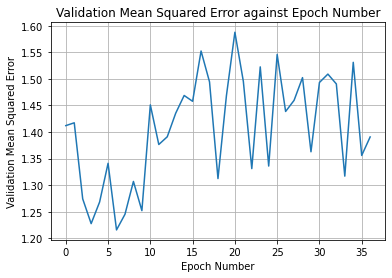

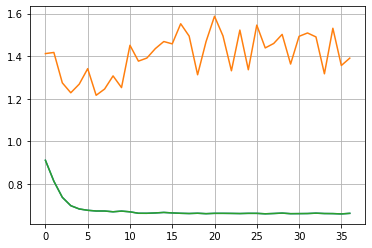

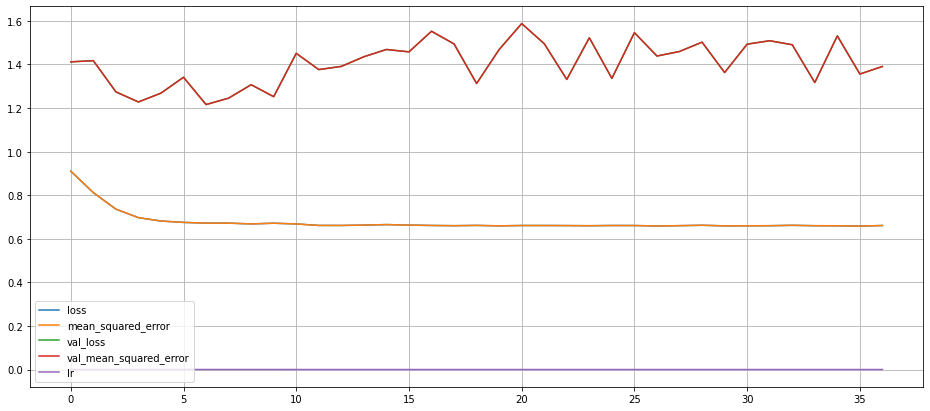

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dF = pd.DataFrame(CNNmodel.history)
print(dF.head())
dF[["val_loss"]].plot(xlabel="Epoch Number",ylabel="Validation Mean Squared Error",title="Validation Mean Squared Error against Epoch Number")
plt.legend().remove()
plt.grid()

dF[["loss"]].plot()
plt.legend().remove()
plt.grid

tempDf1 = dF[["val_loss"]]

#tempDf1.plot(figsize=(16,7))
#plt.grid()

tempDf2 = dF[["loss"]]

plt.plot(tempDf1)
plt.plot(tempDf2)
plt.grid()
plt.show()

#dF[["accuracy","val_accuracy"]].plot(figsize=(16,7))
#plt.grid()
#plt.ylim([0,1])

dF.plot(figsize=(16,7))
plt.grid()

Dropout = True
THESE STATISTICS ARE DODGY!
34/34 [==============================] - 4s 119ms/step - loss: 6.3093 - mean_squared_error: 6.3093
9/9 [==============================] - 1s 108ms/step - loss: 0.8964 - mean_squared_error: 0.8964
Train MSE:  6.309326171875
Test MSE:  0.8964096903800964
34/34 [==============================] - 4s 119ms/step - loss: 6.3093 - mean_squared_error: 6.3093
9/9 [==============================] - 1s 109ms/step - loss: 0.8965 - mean_squared_error: 0.8965
Train MSE:  6.309329032897949
Test MSE:  0.8965001702308655
34/34 [==============================] - 4s 120ms/step - loss: 6.3096 - mean_squared_error: 6.3096
9/9 [==============================] - 1s 108ms/step - loss: 0.8967 - mean_squared_error: 0.8967
Train MSE:  6.309575080871582
Test MSE:  0.8966732025146484

In [ ]:
#Check the confidence intervals and the correct values

#Idea is to use dropout to generate many different datasets then perform analysis on these datasets to see if they contain the correct estimates.


printing=True

pred_train=[]
pred_test=[]

N=30 #37 windows per -> 37N predictions for each earthquake (N=20 => 740 predictions per, 30=> 1110per)
K_train = round(len(x_train)/37)
K_test = round(len(x_test)/37)

#Generating the datasets via dropout
for i in range(N):
  print("Fit number "+ str(i+1)+"/"+str(N))

  temp= model.predict(x_train,verbose = 1) #training
  pred_train.append(temp)

  temp = model.predict(x_test,verbose = 1) #testing
  pred_test.append(temp)



Fit number 1/30
9/9 [==============================] - 1s 114ms/step
Fit number 2/30
9/9 [==============================] - 1s 114ms/step
Fit number 3/30
9/9 [==============================] - 1s 114ms/step
Fit number 4/30
9/9 [==============================] - 1s 114ms/step
Fit number 5/30
9/9 [==============================] - 1s 113ms/step
Fit number 6/30
9/9 [==============================] - 1s 114ms/step
Fit number 7/30
9/9 [==============================] - 1s 113ms/step
Fit number 8/30
9/9 [==============================] - 1s 115ms/step
Fit number 9/30
9/9 [==============================] - 1s 114ms/step
Fit number 10/30
9/9 [==============================] - 1s 114ms/step
Fit number 11/30
9/9 [==============================] - 1s 114ms/step
Fit number 12/30
9/9 [==============================] - 1s 113ms/step
Fit number 13/30
9/9 [==============================] - 1s 113ms/step
Fit number 14/30
9/9 [==============================] - 1s 113ms/step
Fit number 15/30
9/9 [=======

In [ ]:

print( np.array(pred_train).shape)
print( np.array(pred_test).shape)

print(pred_train[0][0])
print(y_train[0])


percentile = 2.5  #PERCENT!!!!! 2.5 -> 95% Conf int   


K_list=[K_train,K_test]


both_Means=[]
both_SDs=[]
both_percentiles=[]

for K in K_list: #for each dataset (training, testing)
  #print(K)
  if K==K_train:
    print("TRAINING DATASET")
  else:
    print("TESTING DATASET")


  Means=[]
  SDs = []
  percentiles=[]
  for k in range(K): #for each earthquake
    #print("Earthquake number "+ str(k+1))
    #print(y_train[37*k])

    dataSet = []
    for n in range(len(pred_train)): #for each dropout fit
      for i in range(37*k,37*(k+1)): #for each window per earthquake

        dataSet.append(pred_train[n][i])

    #print(len(dataSet))
    #print(len(pred_train))

    if k==0:
      HistData = dataSet

    M = len(dataSet)

    temp_Means = list(np.mean(dataSet,axis=0))
    temp_SDs = list(np.std(dataSet,axis=0))
    temp_percs = list(np.percentile(dataSet,[percentile,100-percentile],axis=0))
    temp_percs = [list(item) for item in temp_percs]


    Means.append(temp_Means)
    SDs.append(temp_SDs)
    percentiles.append(temp_percs)

  both_Means.append(Means)
  both_SDs.append(SDs)
  both_percentiles.append(percentiles)
        
  print(len(Means))
  print(Means)
  print(SDs)
  print(percentiles)

(30, 999, 4)
(30, 259, 4)
[0.48623213 0.4678326  0.02508559 0.02084972]
[ 0.66129115  0.34761564 -0.12194379 -0.55659622]
TRAINING DATASET
27
[[0.5269255, 0.374563, 0.056501064, 0.042010598], [0.529821, 0.37435812, 0.055525456, 0.04029533], [0.03709135, 0.022495173, 0.5073521, 0.43306163], [0.25827253, 0.74023724, 0.0010554683, 0.00043462127], [0.39218915, 0.3050616, 0.032596152, 0.27015308], [0.3761641, 0.3795663, 0.05050225, 0.19376744], [0.023705069, 0.012870745, 0.026917, 0.93650746], [0.28448412, 0.26068017, 0.09299342, 0.3618423], [0.43693423, 0.50161487, 0.010324863, 0.051125865], [0.4517816, 0.5212726, 0.0054608546, 0.021484679], [0.0016511176, 0.018838983, 0.978295, 0.0012160332], [0.34302384, 0.61631125, 0.019629903, 0.021034842], [0.13909431, 0.49621075, 0.3551023, 0.009592856], [0.010049903, 0.024974223, 0.94928163, 0.015693955], [0.4257403, 0.5379593, 0.007667403, 0.028633334], [0.07857835, 0.9145694, 0.006015281, 0.00083689025], [0.42715022, 0.5708373, 0.0012525632, 0.000

2.5
[141.6611319134799, 143.45688541527105]


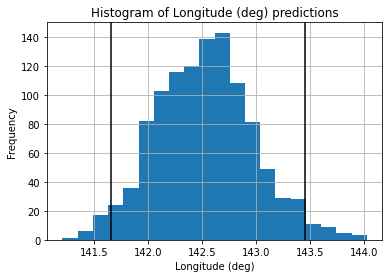

In [ ]:
d=1
Names = ["Latitude (deg)","Longitude (deg)","Depth (km)","Magnitude (Mw)"]
EgData = [Mus[d]+E[d]*Sigs[d] for E in HistData]

print(percentile)
temp_percs = list(np.percentile(EgData,[percentile,100-percentile]))
print(temp_percs)

plt.hist(EgData,bins=20)
plt.title("Histogram of "+Names[d]+" predictions")
plt.axvline(temp_percs[0],color="black")
plt.axvline(temp_percs[1],color="black")
plt.xlabel(Names[d])
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [ ]:
#Now to calculate how many 'hits' there are

#import random

#both_percentiles = [[[[random.random() for k in range(4)] for i in range(2)] for j in range(29)],[[[random.random() for k in range(4)] for i in range(2)] for j in range(7)]]



d=0 

final_accuracies = [[0,0,0,0],[0,0,0,0]] #train, test: lat,long,depth,mag

for K_temp in range(2):
  K=K_list[K_temp]
  if K==K_train:
    print("TRAINING DATASET")
    correct_data = y_train
  else:
    print("TESTING DATASET")
    correct_data = y_test

  #print(len(correct_data))
  #print(len(both_percentiles[K_temp]))

  N = len(both_percentiles[K_temp])
  #print(N)
  counter=0
  for d in range(4):#0=lat,1=long,2=depth,3=mag
    print("d="+str(d))
    for i in range(N):
      print(str(both_percentiles[K_temp][i][0][d])+ " <? "+str(correct_data[37*i][d])+ " <? "+str(both_percentiles[K_temp][i][1][d]))

      correctFlag = True
      #print(correct_data[i][d])
      #print(both_percentiles[K_temp][i][0][d])
      if correct_data[37*i][d] < both_percentiles[K_temp][i][0][d]:
        correctFlag=False
      elif correct_data[37*i][d] > both_percentiles[K_temp][i][1][d]:
        correctFlag=False

      if correctFlag==True:
        counter+=1
    final_accuracies[K_temp][d] = round(100*counter/N,1)

print("\n\n")



TRAINING DATASET
d=0
0.41579725295305253 <? 0.6612911529368559 <? 0.6298293530941008
0.422071073949337 <? 0.6697215985304958 <? 0.6454744398593902
0.01633003377355635 <? -0.2967696823173822 <? 0.07403215952217569
0.1322442814707756 <? 1.6466074529923171 <? 0.43439408764243076
0.2884120263159275 <? 0.7088766181560254 <? 0.5044840231537818
0.2713340066373348 <? 1.0229585443118188 <? 0.47850082367658586
0.00896602615248412 <? 0.3764288196025899 <? 0.05005130833014834
0.1668966867029667 <? 0.4935622724497757 <? 0.4035099081695079
0.33472500145435335 <? 0.5098747382807378 <? 0.5503057926893233
0.33518877550959586 <? -0.074160003964291 <? 0.5822734534740447
0.00015518590662395583 <? -1.403504805446146 <? 0.006867279636207954
0.21986278258264066 <? -0.4372430980032386 <? 0.4668981693685053
0.06116581102833152 <? 0.19822884103324304 <? 0.24311608374118804
0.0023332888376899064 <? -1.0415185621198357 <? 0.03069011108018454
0.318181549012661 <? 0.8592471984117229 <? 0.5442994862794875
0.03127205

In [ ]:
#Printing the un-normalised confidence intervals
Mus = [35.94906111111111, 139.1023444444444, 63.993055555555564, 6.269444444444444]
Sigs = [7.840629450223392, 9.13841370991669, 109.8297495070197, 0.3044297441706504]


d=0 

#final_accuracies = [[0,0,0,0],[0,0,0,0]] #train, test: lat,long,depth,mag

for K_temp in range(2):
  K=K_list[K_temp]
  if K==K_train:
    print("TRAINING DATASET")
    correct_data = y_train
  else:
    print("TESTING DATASET")
    correct_data = y_test

  #print(len(correct_data))
  #print(len(both_percentiles[K_temp]))

  N = len(both_percentiles[K_temp])
  #print(N)
  counter=0
  for d in range(4):#0=lat,1=long,2=depth,3=mag
    print("d="+str(d))
    for i in range(N):
      print(str(round(Mus[d] +Sigs[d]*both_percentiles[K_temp][i][0][d],4))+ " <? "+str(round(Mus[d]+Sigs[d]*correct_data[37*i][d],4))+ " <? "+str(round(Mus[d]+Sigs[d]*both_percentiles[K_temp][i][1][d],4)))



print("\n\n")

TRAINING DATASET
d=0
39.2092 <? 41.134 <? 40.8873
39.2584 <? 41.2001 <? 41.01
36.0771 <? 33.6222 <? 36.5295
36.9859 <? 48.8595 <? 39.355
38.2104 <? 41.5071 <? 39.9045
38.0765 <? 43.9697 <? 39.7008
36.0194 <? 38.9005 <? 36.3415
37.2576 <? 39.8189 <? 39.1128
38.5735 <? 39.9468 <? 40.2638
38.5772 <? 35.3676 <? 40.5145
35.9503 <? 24.9447 <? 36.0029
37.6729 <? 32.5208 <? 39.6098
36.4286 <? 37.5033 <? 37.8552
35.9674 <? 27.7829 <? 36.1897
38.4438 <? 42.6861 <? 40.2167
36.1943 <? 23.4226 <? 37.1674
37.8747 <? 49.3941 <? 40.7711
37.8181 <? 51.4994 <? 39.8886
38.6181 <? 41.1034 <? 40.5838
36.3682 <? 24.1359 <? 37.4727
38.1577 <? 37.7597 <? 40.2483
36.7082 <? 40.4096 <? 38.6988
36.5283 <? 30.5926 <? 38.4397
36.0431 <? 24.7632 <? 36.8962
35.9657 <? 29.4132 <? 36.1671
38.1671 <? 23.5934 <? 39.7206
38.2819 <? 37.7079 <? 40.6274
d=1
141.6611 <? 142.279 <? 143.4569
141.6457 <? 142.2065 <? 143.4138
139.1904 <? 131.8077 <? 139.5135
144.2572 <? 156.2259 <? 147.0221
141.0691 <? 142.0564 <? 142.7867
141.3

In [ ]:
#PRINTING FINAL RESULTS

print("Training accuracies (%): "+ str(final_accuracies[0]))
print("Testing accuracies (%):  "+ str(final_accuracies[1]))


model.load_weights(WeightsFile)
Tr = model.evaluate(x_train, y_train, verbose=1)[-1]
Te = model.evaluate(x_test, y_test, verbose=1)[-1]

print('Train MSE: ', Tr)
print('Test MSE: ', Te)

Tr = model.evaluate(x_train, y_train, verbose=1)[-1]
Te = model.evaluate(x_test, y_test, verbose=1)[-1] 

print('Train MSE: ', Tr)
print('Test MSE: ', Te)

Tr = model.evaluate(x_train, y_train, verbose=1)[-1]
Te = model.evaluate(x_test, y_test, verbose=1)[-1]

print('Train MSE: ', Tr)
print('Test MSE: ', Te)

Training accuracies (%): [7.4, 29.6, 29.6, 33.3]
Testing accuracies (%):  [14.3, 14.3, 14.3, 14.3]
9/9 [==============================] - 1s 107ms/step - loss: 1.2160 - mean_squared_error: 1.2160
Train MSE:  0.7532001733779907
Test MSE:  1.2160258293151855
9/9 [==============================] - 1s 107ms/step - loss: 1.2124 - mean_squared_error: 1.2124
Train MSE:  0.7543395161628723
Test MSE:  1.2124422788619995
9/9 [==============================] - 1s 109ms/step - loss: 1.2121 - mean_squared_error: 1.2121
Train MSE:  0.7528862357139587
Test MSE:  1.212063193321228


In [ ]:


predictions=[[],[]]
print(predictions)
for k in range(2):
  print("k="+str(k))
  for i in range(len(both_Means[k])):
    temp = both_Means[k][i]
    templist=[]
    for d in range(4):

      tempval = temp[d]*Sigs[d]+Mus[d]
      templist.append(tempval)
    print(templist)
    predictions[k].append(templist)




[[], []]
k=0
[40.080488737475115, 142.5252561769764, 70.19855331092947, 6.282233720010925]
[40.103191079593905, 142.52338379855988, 70.09140243798781, 6.281711541126419]
[36.23988062909932, 139.30791464104377, 119.71541111769253, 6.401281285533534]
[37.97408030541523, 145.86693855070737, 64.10897737889248, 6.269576756085361]
[39.02407087214755, 141.89012363041377, 67.57308279489942, 6.351687076092617]
[38.89842449844917, 142.57097843235124, 69.53970522398876, 6.328433017636649]
[36.13492377304146, 139.21996263520037, 66.94934285382786, 6.554545171958015]
[38.17959566657269, 141.48454767352302, 74.20649994708506, 6.379600004623803]
[39.374900523921944, 143.68630863713048, 65.12703264899646, 6.285008678577692]
[39.49131323473624, 143.86594911612042, 64.59281985053602, 6.275985019657628]
[35.96200691222012, 139.27450286523867, 171.43895344778818, 6.269814641132838]
[38.63858390658527, 144.73445164036775, 66.14900290001444, 6.275848076121868]
[37.039648038920845, 143.63692360105398, 102.99